<h1>Tasks 4 & 5</h1>

<h2>Useful Libraries</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from PIL import Image
from scipy.io import loadmat
import math
import cv2
import random
from sklearn.model_selection import train_test_split
import seaborn as sn
import pandas as pd
np.random.seed(7)

%matplotlib inline 

In C:\Users\basan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\basan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\basan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\basan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\basan\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

<h2>Task 4</h2>

<h3>Exercise 1 - Implement the Quantization Step</h3>

In [2]:
def read_image(path, mode):
    image_path = path
    data_format = mode

    im = Image.open(image_path).convert("L")
    if(data_format == "gray"):
        return np.array(im).flatten().reshape(-1,1) # pixels x channels
    else:
        return plt.imread(image_path).reshape(-1,3)# pixels x channels

In [3]:
def display_image(X, mode):
    
    if(mode == "gray"):
        X1 = X.reshape(321,481)
        X1 = X1.astype(np.uint8)
        im=Image.fromarray(X1).convert("L")
        plt.imshow(im,cmap="gray")
        return X1
    
    else:
        X1 = X.reshape(321,481,3)
        X1 = X1.astype(np.uint8)
        im=Image.fromarray(X1)
        plt.imshow(im)
        return X1

In [4]:
def quantize(X,QI):
    q = lambda x: (QI * (x//QI))
    res = q(X)
    return res

<h3>Exercise 2 - Applying Quantization to Images</h3>

<h4>a. Select two gray level images from Dataset 2.</h4>
<h4>b. Apply the quantization step.</h4>
<h4>c. Report the images before and after the quantization.
</h4>

Image 1 - Before

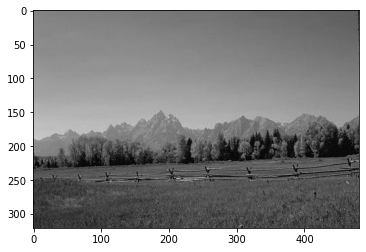

In [5]:
XG = read_image('images-4,5//quant1_gray.jpg', 'gray')
XG = display_image(XG, "gray")
XGr = quantize(XG,16)

Image 1 - After

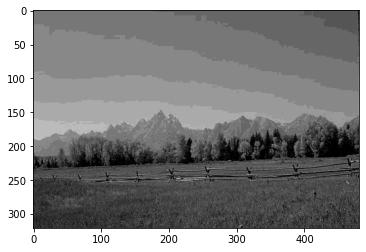

In [6]:
display_image(XGr, "gray");

Image 2 - Before

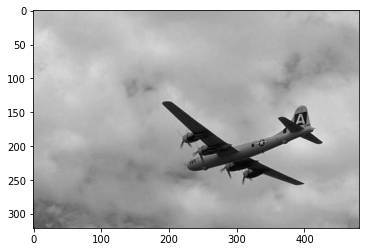

In [7]:
XG1 = read_image('images-4,5//quant2_gray.jpg', 'gray')
XG1 = display_image(XG1, "gray")
XG1r = quantize(XG1,16)

Image 2 - After

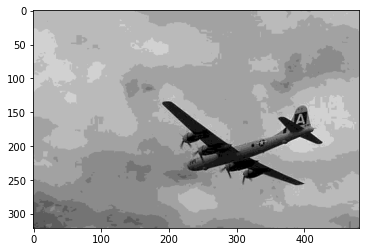

In [8]:
display_image(XG1r, "gray");

<h4>d. From the Dataset 2 select the corresponding color images of the previously selected
gray level images and apply the quantization step.</h4>
<h4>e. Report the images before and after the quantization</h4>

Image 1 - before

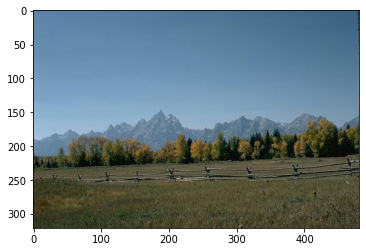

In [9]:
XC = read_image('images-4,5//quant1_color.jpg', 'color')
XC = display_image(XC, "color")
XCr = quantize(XC,16)

Image 1 - after

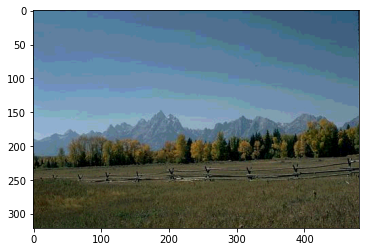

In [10]:
display_image(XCr, "color");

Image 2 - before

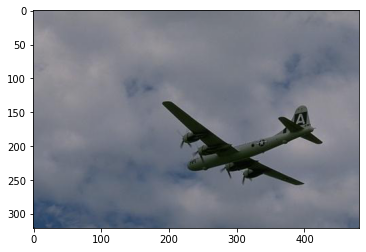

In [11]:
XC1 = read_image('images-4,5//quant2_color.jpg', 'color')
XC1 = display_image(XC1, "color")
XC1r = quantize(XC1,16)

Image 2 - After

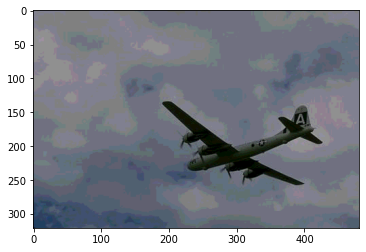

In [12]:
display_image(XC1r, "color");

<h1>Task 5</h1>

<h3>Exercises 3, 4, and 5 - Naive Bayes Binary Classifier</h3>

In [19]:
class NaiveBayes():
    
    
    
    def __init__(self, XCQ_p, XGB_p):
        
        self.XCQ = XCQ_p
        self.XGB = XGB_p
        
        self.input_values = np.unique(self.XCQ.reshape(1,-1), axis=1).reshape(-1,1)
        self.output_values = np.unique(self.XGB.reshape(1,-1), axis=1).reshape(-1,1)
        self.c = self.XCQ.shape[2]
        
        self.lookup = np.zeros(shape = (self.output_values.shape[0], self.input_values.shape[0], self.c))
        self.labels_count = np.zeros(shape = (self.output_values.shape[0],1))
        self.labels_prob = np.zeros(shape = (self.output_values.shape[0],1))

    
    
    #train will be making lookup table: P(channel_color | label) for each possible color and label combination - use smoothing.
    #also, compute P(channel_color for each color in each channel) and P(label) for each label
    
    def BayesModel(self, dta, gt):
        
        count = 0
    
        #implement lookup table
        for label in range(self.lookup.shape[0]):
            print("********************")
            print("label:", self.output_values[label])
            
            label_only = dta[(gt == self.output_values[label][0]).reshape(gt.shape[0])]
            
            print("inp shape:", self.lookup.shape)
            self.labels_count[label] = int(label_only.shape[0])
            self.labels_prob[label] = self.labels_count[label] / (dta.shape[0])
            print(self.labels_count[label] , dta.shape[0], self.labels_prob[label])

            for color in range(self.lookup.shape[2]):
                label_color_only = label_only[:,color]

                for val in range(lookup.shape[1]):
                    label_color_value_only = label_color_only[np.where(label_color_only == self.input_values[val])]
                    self.lookup[label, val, color] = label_color_value_only.shape[0]
                    count = count + label_color_value_only.shape[0]

                    #probability 
                    self.lookup[label, val, color] = self.lookup[label, val, color] / self.labels_count[label]
                    #print('lookup of', label, val, color, ':',lookup[label, val, color])
        #print(lookup)

        BM =  [self.lookup, self.labels_prob]
        return BM
    
    
    
    
    def BayesPredict(self, BM, td):
        
        test_X = td
        pred_Y = np.zeros(shape = (test_X.shape[0],1))
        
        #loop for each point to get lookup table entry
        
        for pt in range(test_X.shape[0]):
            sample = test_X[pt]
            prob_output = []
            
            for l in range(self.output_values.shape[0]):
                prob_ch_val_given_l = self.labels_prob[l]
                
                for ch in range(self.c):
                    itemindex = np.where(self.input_values==sample[ch])
                    prob_ch_val_given_l = prob_ch_val_given_l * self.lookup[l,itemindex[0][0],ch]
                
                prob_output.append(prob_ch_val_given_l)
            
            l_index = prob_output.index(max(prob_output))
            pred = self.output_values[l_index][0]
            pred_Y[pt][0] = pred
        
        return pred_Y
    
    
    def ConfMtrx(self,gt,lbl):
        
        preds_r = lbl
        XGB_r = gt
        
        resFalse = preds_r.reshape(-1,1) - XGB_r.reshape(-1,1) #0 if true, -255 if should be >0, 255 if should be<0
        resTrue = preds_r.reshape(-1,1) + XGB_r.reshape(-1,1) #1 if false, 0 if should be 0, 510 if should be >0
        
        Exp0Get0 = np.sum(resTrue == 0)
        Exp1Get1 = np.sum(resTrue == 510)
        Exp0Get1 = np.sum(resFalse == 255)
        Exp1Get0 = np.sum(resFalse == -255)
        
        matrix = [[Exp0Get0, Exp0Get1], [Exp1Get0,Exp1Get1]]
        
        df_cm = pd.DataFrame(matrix, index = [i for i in "01"],
                  columns = [i for i in "01"])
        plt.figure(figsize = (7,5));
        sn.heatmap(df_cm, annot=True, cmap='Blues', fmt='g');
        plt.title('Confusion Matrix')
        plt.xlabel('Prediction');
        plt.ylabel('Ground Truth');
        
        return matrix

<h3>Exercise 7 - Data Preparation (a, b)

<h4>a. Input Data</h4>

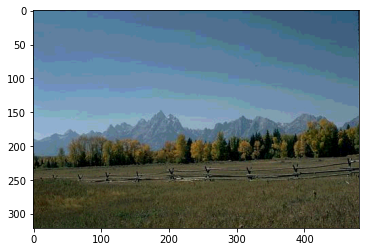

In [20]:
XCQ = display_image(XCr, "color")

<h4>b. Ground Truth Data</h4>

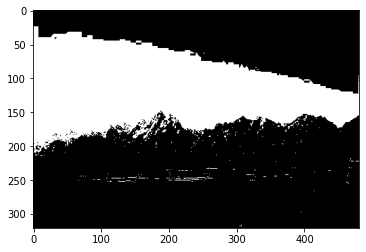

In [21]:
th, XGBT = cv2.threshold(XG, 128, 255, cv2.THRESH_BINARY)
XGB = display_image(XGBT, "gray")

<h3>Exercise 6 - train-test split </h3>

In [22]:
ix = np.arange(XCQ.shape[0]*XCQ.shape[1]).reshape(XCQ.shape[0]*XCQ.shape[1],1)

train_ix, test_ix = train_test_split(ix, test_size=0.2)

test_X = XCQ.reshape(-1,3)[test_ix][:].reshape(-1,3)
train_X = XCQ.reshape(-1,3)[train_ix][:].reshape(-1,3)

test_Y = XGB.reshape(-1,1)[test_ix][:].reshape(-1,1)
train_Y  = XGB.reshape(-1,1)[train_ix][:].reshape(-1,1)

<h3>Exercise 7 - Apply Naive Bayes on Data (c,d) </h3>

<h4>c. Apply NB </h4>

In [23]:
nb = NaiveBayes(XCQ,XGB)

In [24]:
BM = nb.BayesModel(train_X,train_Y)

********************
label: [0]
inp shape: (2, 16, 3)
[83600.] 123520 [0.67681347]


NameError: name 'lookup' is not defined

In [ ]:
img_quant = XCQ.reshape(-1,3)

In [ ]:
lbl = nb.BayesPredict(BM, img_quant)

In [ ]:
preds_r = lbl.reshape(321, 481)

<h4>d. Report on...</h4>

In [ ]:
display_image(XCr, "color");
plt.title("Input Image");

In [ ]:
display_image(XGBT, "gray")
plt.title('Ground Truth Thresholded Image');

In [ ]:
display_image(preds_r, "gray");
plt.title("Predicted Binary Image");

In [ ]:
Mtrx = nb.ConfMtrx(XGB,preds_r)